## Hindi LSTM
by Vik Reddy, 4/2/2017

In [1]:
# Imports

# Array Work
import numpy as np
import pandas as pd

# Image
from PIL import Image

# Plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Preprocessing

In [57]:
def binarize(im, threshold):
    im = np.array(Image.open(im).convert('L'), dtype=np.uint32)
    
    # convert to pandas DataFrame to apply filter
    df = pd.DataFrame(im)
    df = df.applymap(lambda x: 255 if x > threshold else 0)
    
    # Convert to 32-bit integer because that is the only type that
    # PIL supports
    df = df.astype(np.uint32)
    
    return df

def show_image(df,width,height):
    ''' Shows an image from a dataframe '''
    # convert df back to np array
    im = Image.fromarray(np.asarray(df))
    
    # Show in a new window:
    # im.show()
    
    # Show inline:
    plt.figure(figsize=(width,height))
    plt.imshow(im)

In [ ]:
df = binarize('Char_train/m.jpg', 170)
show_image(df, 3, 4)

## Layout Module: Text-line Segmentation

In [5]:
whole_page = binarize('Page_train/100.jpg', 170)

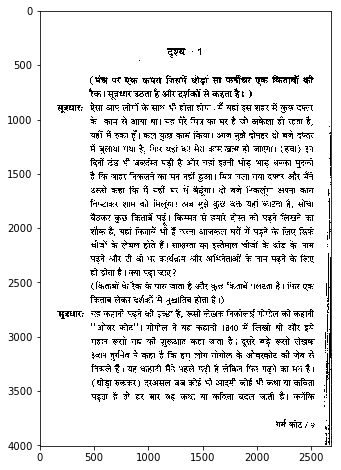

In [36]:
show_image(whole_page, 6, 8)

In [194]:
whole_page

,0,1,2,3,4,5,6,7,8,9,...,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [175]:
def filt(df):
    #f = lambda x: 
    #lambda x: lst.append(x) if x==255 else print('black'
    return 

def get_lines(df):
    '''Extracts text lines from a scanned document
    after binarization.
    '''
    return df.apply(filt, axis=1)

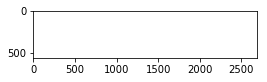

In [197]:
lst_of_series = []
black_pixel = 0
white_pixel = 255
for i, row in whole_page.iterrows():
    if (row == white_pixel).all():
        lst_of_series.append(row)
white_space = pd.DataFrame(lst_of_series)
show_image(white_space, 4, 6)

### Prototyping the text layout algorithm:

In [67]:
def get_lines_as_dfs(df):
    ''' Extract text lines as individual dataframes
    
    Parameters:
    df - the whole page of text as a pandas dataframe
    
    Returns:
    text_lines - A dictionary of dataframes
    '''
    black_pixel = 0
    white_pixel = 255
    text_lines = {}
    for i, row in df.iterrows():
        # This implementation skips the first row of pixels. Make sure the first row
        # doesn't have text
        if i > 0:
            # Find the first row containing text (black pixels)
            if (row == black_pixel).any() and (df.ix[i - 1] == white_pixel).all():
                # Create new list to store text line
                lst_of_series = []
            # Find the middle row(s) containing text (black pixels)
            if (row == black_pixel).any() and (df.ix[i - 1] == black_pixel).any():
                lst_of_series.append(row)
            # Find the first white row after the last row containing text
            if (row == white_pixel).all() and (df.ix[i - 1] == black_pixel).any():
                text_lines[i] = pd.DataFrame(lst_of_series)
    return text_lines

In [68]:
text = get_lines_as_dfs(whole_page.loc[:,:2600])

In [54]:
whole_page.loc[:,:2650]

,0,1,2,3,4,5,6,7,8,9,...,2641,2642,2643,2644,2645,2646,2647,2648,2649,2650
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [69]:
print(text.keys())

dict_keys([104, 179, 433, 456, 492, 687, 816, 943, 1060, 1198, 1321, 1447, 1576, 1703, 1829, 1978, 2078, 2197, 2330, 2457, 2582, 2711, 2841, 2861, 2955, 2969, 2988, 3094, 3220, 3231, 3344, 3370, 3472, 3598, 3683, 3843, 3848, 3869, 3968])


In [70]:
line_index = list(text.keys())

In [71]:
def show_lines(text, indices):
    for i in indices:
        try:
            if text[i].shape[0] > 10:
                show_image(text[i], 20, 10)
        except ValueError as e:
            # Some black dots are in the document, cause an error in reading
            print(i, e)
        finally:
            pass


/Users/vikram/anaconda/envs/tensor/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


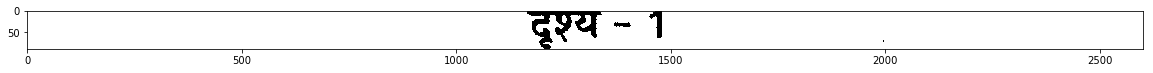

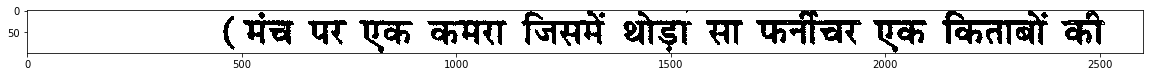

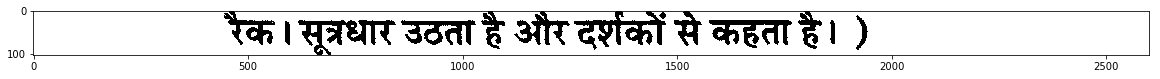

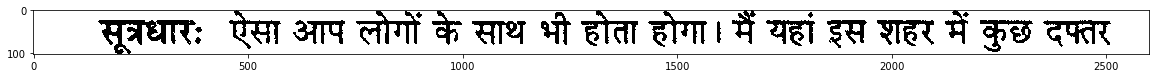

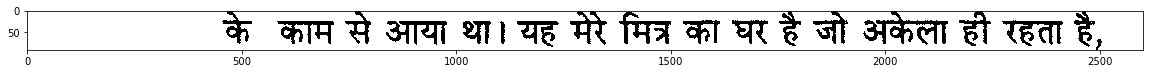

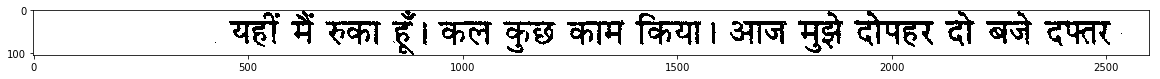

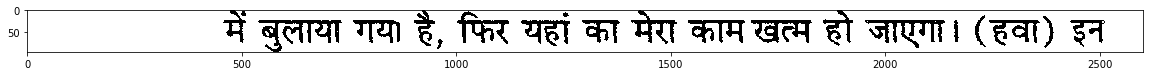

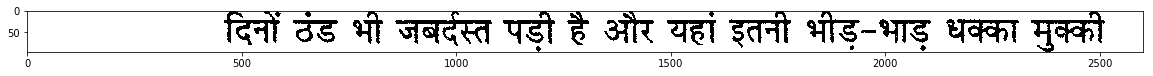

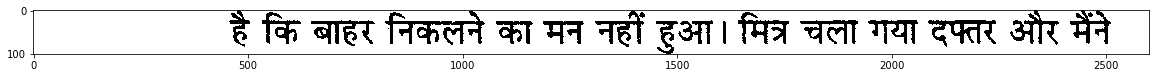

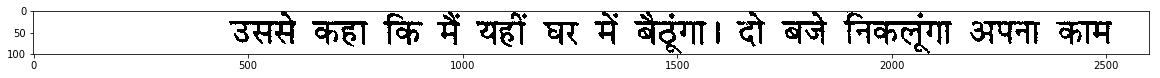

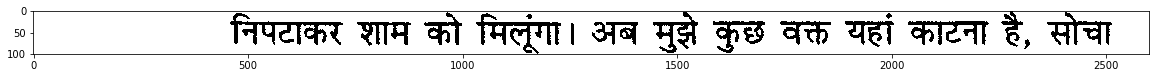

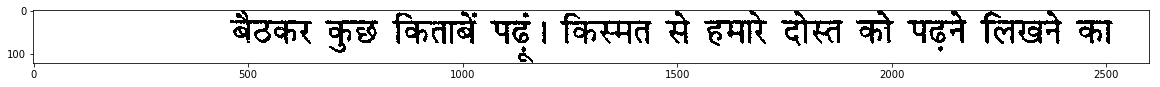

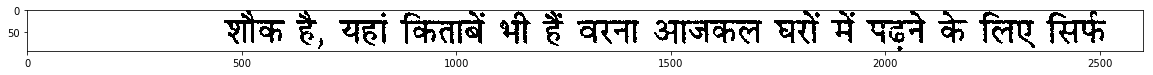

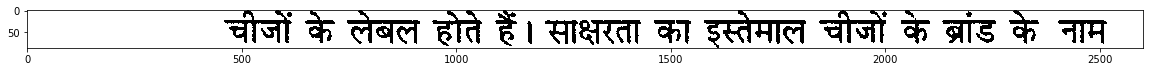

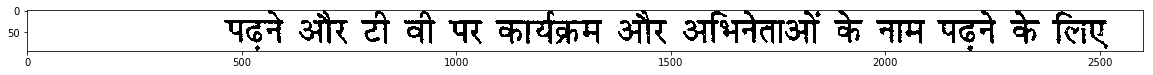

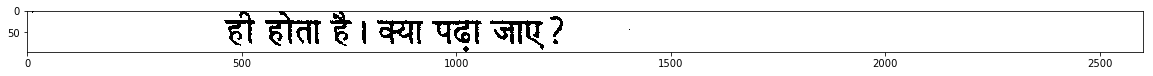

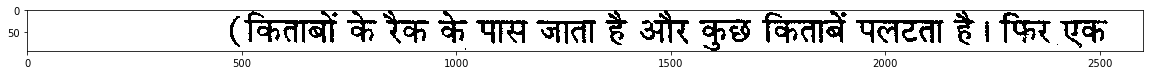

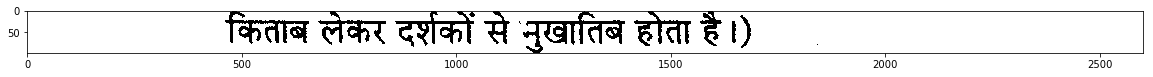

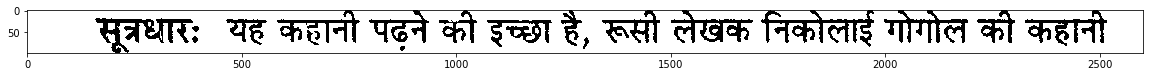

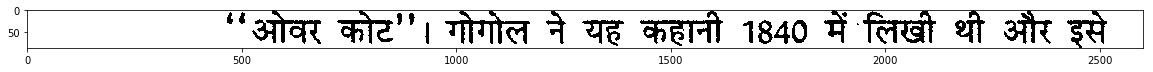

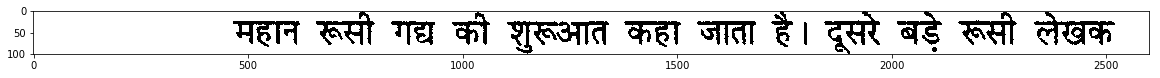

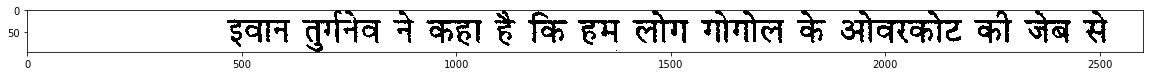

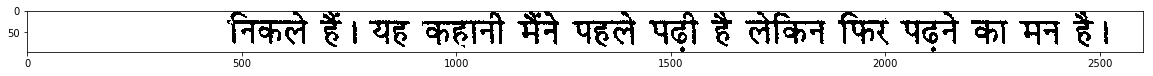

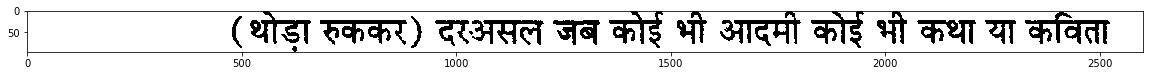

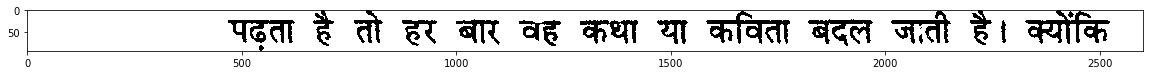

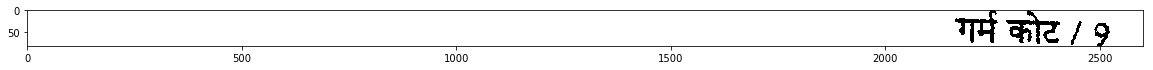

In [72]:
show_lines(text, line_index)

In [198]:
white_space.shape

(564, 2682)

### Create the sequence and timesteps

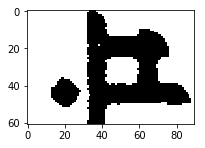

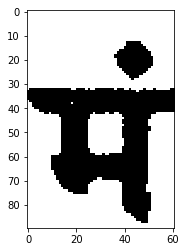

In [48]:
# The transpose is not really what I want...
# but it'll do for now,
# It is wrong because it flips the image over the diagonal
df_pixel_cols = df.transpose()
show_image(df_pixel_cols)
show_image(df)

#### Create sequences of input vectors

In [91]:
dff = df.transpose()
dff['single_input_vec'] = dff.apply(tuple, axis=1).apply(lambda x: [list(x)])
dff['sequence_of_vecs'] = dff.single_input_vec.cumsum()

In [96]:
print(dff.sequence_of_vecs[0])

[[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]]


#### Add label value and create dummy variables

In [104]:
dff['label'] = 'm'
has_letters = pd.get_dummies(dff['label'])
dff['is_m'] = has_letters

In [231]:
dff

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,single_input_vec,sequence_of_vecs,label,is_m,padded_sequences,output_vec
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
7,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
8,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",m,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[1]


In [101]:
# Pad the sequences with 0s
from keras.preprocessing.sequence import pad_sequences

max_sequence_length = dff.sequence_of_vecs.apply(len).max()
# change to list so that the input to Series can be a 1-d list, not a 3-d array
padded = pad_sequences(dff.sequence_of_vecs, max_sequence_length).tolist()
dff['padded_sequences'] = pd.Series(padded).apply(np.asarray)

#### Create output vector

In [112]:
dff['output_vec'] = dff[['is_m']].apply(tuple, axis=1).apply(list)

### Build training data

In [116]:
# reshape training into (# of records, total_timesteps, input_dimensions)
X_train = np.hstack(np.asarray(dff.padded_sequences)).reshape(
    len(dff),
    max_sequence_length,
    df.transpose().shape[1])

possible_labels = 1

# reshape labels into (# of records, # of different possible labels = output dimension)
y_train = np.hstack(np.asarray(dff.output_vec)).reshape(
    len(dff),
    possible_labels)


#### Get input dimensions to put into model

In [119]:
input_length = X_train.shape[1] # 61
input_dim = X_train.shape[2] # 90
output_dim = len(y_train[0])

### Build RNN Model

In [121]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense

# Initialize the model
model = Sequential()

# Arbitrarily pick output dim of LSTM to be 4
model.add(LSTM(4, input_shape=(input_length, input_dim)))
# Output value is categorical, so used sigmoid as final activation
model.add(Dense(output_dim, activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='sgd',
             metrics=['accuracy'])

In [131]:
history = model.fit(X_train, 
                    y_train,
                    batch_size=20, 
                    epochs=40,
                    verbose=1
                   )

Epoch 1/40
61/61 [==============================] - 0s - loss: 0.0813 - acc: 1.0000     
Epoch 2/40
61/61 [==============================] - 0s - loss: 0.0804 - acc: 1.0000     
Epoch 3/40
61/61 [==============================] - 0s - loss: 0.0795 - acc: 1.0000     
Epoch 4/40
61/61 [======================

In [132]:
model.predict(X_train)

array([[ 0.8299709 ],
       [ 0.75419509],
       [ 0.83615333],
       [ 0.83626479],
       [ 0.83627987],
       [ 0.83628196],
       [ 0.83628219],
       [ 0.83628231],
       [ 0.83628231],
       [ 0.83628231],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.83534217],
       [ 0.66901016],
       [ 0.66919041],
       [ 0.66921484],
       [ 0.66921812],
       [ 0.66921812],
       [ 0.66921812],
       [ 0.6692186 ],
       [ 0.66921866],
       [ 0.66921866],
       [ 0.66921866],
       [ 0.66921866],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.83534217],
       [ 0.83615333],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.8299709 ],
       [ 0.80851412],
       [ 0.66901016],
       [ 0.66901016],
       [ 0.66901016],
       [ 0.66901016],
       [ 0.66901016],
       [ 0